In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

In [2]:
# Load Train CSV

TRAIN_CSV_PATH = './dataset/train.csv'

df_train = pd.read_csv(TRAIN_CSV_PATH)

df_train.head()

,id,jenis,warna
0,1,1,1
1,2,0,2
2,3,1,3
3,4,1,1
4,5,0,4


In [3]:
# Load Train Images

X_raw = []
Y_shape = []
Y_color = []

TRAIN_IMG_PATH = './dataset/train/'

target_size = (224, 224)


for idx, file in enumerate(os.listdir(TRAIN_IMG_PATH)):
    
    file_path = os.path.join(TRAIN_IMG_PATH, file)
    
    # Load data in RGB format for color classification
    image = tf.keras.preprocessing.image.load_img(file_path, color_mode='rgb', target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # Get file name
    file_id = os.path.splitext(file)[0]
    
    # Extract matching row, where id == name from train.csv
    matching_row = df_train[df_train['id'] == int(file_id)]
    
    if not matching_row.empty:
        X_raw.append(image)
        Y_shape.append(matching_row['jenis'].values[0])
        Y_color.append(matching_row['warna'].values[0])
    else:
        print(f"No matching row found for file {file}")
    
    
# Convert to numpy array for easier manipulation
X_raw = np.array(X_raw)
Y_shape = np.array(Y_shape)
Y_color = np.array(Y_color)
 
print(X_raw[100], Y_shape[100], Y_color[100])

[[[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]]

 ...

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [245. 245. 245.]
  [253. 253. 253.]
  [251. 249. 250.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [248. 248. 248.]
  [243. 243. 243.]
  [253. 251. 252.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [250. 250. 250.]
  [255. 254. 255.]
  [244. 242. 243.]]] 0 2


Preprocessing

In [4]:
# Check X, Y shape

print(f'X shape: {X_raw.shape}')
print(f'Y_shape shape: {Y_shape.shape}')
print(f'Y_color shape: {Y_color.shape}\n')

# Check Y classes

shape_classes = np.unique(Y_shape)
color_classes = np.unique(Y_color)

print(f'Shape classes: {shape_classes}')
print(f'Color classes: {color_classes}')

X shape: (777, 224, 224, 3)
Y_shape shape: (777,)
Y_color shape: (777,)

Shape classes: [0 1]
Color classes: [0 1 2 3 4]


In [5]:
# Normalize X by pixel value

X_normalized = X_raw / 255

print(X_normalized[100])

[[[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]]

 ...

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]
  ...
  [0.9607843  0.9607843  0.9607843 ]
  [0.99215686 0.99215686 0.99215686]
  [0.9843137  0.9764706  0.98039216]]

 [[0.972549   0.972549   0.972549  ]
  [0.972549   0.972549   0.972549  ]


In [6]:
# Dictionary for label (based on kaggle's data)

index_to_shape_dict = {0 : 'Kaos', 1 : 'Hoodie'}
index_to_color_dict = {0: 'Merah', 1: 'Kuning', 2: 'Biru', 3: 'Hitam', 4: 'Putih'}

In [7]:
# Apply One hot encoding for Y_color (multi-class / more than 2)

def one_hot_encoding(Y: np.array, num_classes: int) -> np.array:
    
    encoded = tf.keras.utils.to_categorical(Y, num_classes= num_classes)
    
    return encoded

shape_num_classes = shape_classes.shape[0]
color_num_classes = color_classes.shape[0]

Y_color_encoded = one_hot_encoding(Y_color, color_num_classes)

print(Y_color_encoded.shape)

(777, 5)


In [8]:
# Train Validation Split (80:20)

X_train, X_val, Y_shape_train, Y_shape_val, Y_color_train, Y_color_val = train_test_split(
    X_normalized, Y_shape, Y_color_encoded, test_size=0.2, random_state=42)

# Print the shapes of the training and validation datasets
print(f'X_train shape: {X_train.shape} | val: {X_val.shape}')
print(f'Y_shape_train shape: {Y_shape_train.shape} | val: {Y_shape_val.shape}')
print(f'Y_color_train shape: {Y_color_train.shape} | val: {Y_color_val.shape}\n')

X_train shape: (621, 224, 224, 3) | val: (156, 224, 224, 3)
Y_shape_train shape: (621,) | val: (156,)
Y_color_train shape: (621, 5) | val: (156, 5)



In [9]:
# Define input shape

input_shape = X_train.shape[1:]

print(f'Input shape: {input_shape}')

Input shape: (224, 224, 3)


In [10]:
# Define Exact Match Ratio metrics

def exact_match_ratio(y_true, y_pred):
    
    y_pred = tf.round(tf.nn.sigmoid(y_pred))
    ratio = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    
    return ratio

In [22]:
# Model 

# (Strided CNN)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
])

# CNN
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=input_shape),
#     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),    
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
# ])


features = model.output
shape_output = tf.keras.layers.Dense(1, activation='sigmoid', name='shape_output')(features)
color_output = tf.keras.layers.Dense(color_num_classes, activation='linear', name='color_output')(features)

model = tf.keras.Model(inputs=model.input, outputs=[shape_output, color_output])

print(model.summary())

lr = 0.0001
epochs = 30

# Use logits for more accurate decimal calculation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss={'shape_output': tf.keras.losses.BinaryCrossentropy(from_logits=True), 'color_output': tf.keras.losses.CategoricalCrossentropy(from_logits=True)},
              metrics=['accuracy'])

history = model.fit(X_train, {'shape_output': Y_shape_train, 'color_output': Y_color_train}, 
                    validation_data=(X_val, {'shape_output': Y_shape_val, 'color_output': Y_color_val}),
                    epochs=epochs)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 56, 56, 64)   18496       ['conv2d_3[0][0]']               
                                                                                            

c:\Users\LENOVO\anaconda3\envs\tensorflow_p310\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - 3s 66ms/step - loss: 2.0205 - shape_output_loss: 0.6634 - color_output_loss: 1.3570 - shape_output_accuracy: 0.6119 - color_output_accuracy: 0.4412 - val_loss: 1.5792 - val_shape_output_loss: 0.6137 - val_color_output_loss: 0.9655 - val_shape_output_accuracy: 0.6474 - val_color_output_accuracy: 0.7628
Epoch 2/30
20/20 [==============================] - 1s 49ms/step - loss: 1.3848 - shape_output_loss: 0.6330 - color_output_loss: 0.7518 - shape_output_accuracy: 0.6425 - color_output_accuracy: 0.7778 - val_loss: 1.0082 - val_shape_output_loss: 0.5606 - val_color_output_loss: 0.4476 - val_shape_output_accuracy: 0.7500 - val_color_output_accuracy: 0.8782
Epoch 3/30
20/20 [==============================] - 1s 48ms/step - loss: 1.0730 - shape_output_loss: 0.6215 - color_output_loss: 0.4516 - shape_output_accuracy: 0.6731 - color_output_accuracy: 0.8567 - val_loss: 0.8261 - val_shape_output_loss: 0.5295 - val_color_output_loss: 0.2966 - val_shape_output

Load submission data

In [23]:
X_to_be_predicted = []
filenames = []

TEST_IMG_PATH = "./dataset/test/"
target_size = (224, 224)

for file in os.listdir(TEST_IMG_PATH):
    file_path = os.path.join(TEST_IMG_PATH, file)

    image_rgb = tf.keras.preprocessing.image.load_img(
        file_path, color_mode="rgb", target_size=target_size
    )
    image_rgb = tf.keras.preprocessing.image.img_to_array(image_rgb)

    X_to_be_predicted.append(image_rgb)
    filenames.append(file)  # Track the filename

# Convert images to numpy array for easier manipulation
X_to_be_predicted = np.array(X_to_be_predicted)

# Normalize the images
X_to_be_predicted_normalized = X_to_be_predicted / 255.0

In [82]:
# Make predictions
prediction_result = model.predict(X_to_be_predicted_normalized)

shape_prediction = np.round(prediction_result[0])
color_prediction = np.argmax(prediction_result[1], axis=1)

11/11 [==============================] - 0s 30ms/step


Show predictions

In [83]:
print('Shape prediction results: ')
print(shape_prediction)

# Print results with filenames
shape_predictions_with_filenames = list(zip(filenames, shape_prediction))
for filename, prediction in shape_predictions_with_filenames:
    print(f"Image: {filename}, Shape: {prediction}")

Shape prediction results: 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

In [84]:
print('Color prediction results: ')
print(color_prediction)

color_predictions_with_filenames = list(zip(filenames, color_prediction))
for filename, prediction in color_predictions_with_filenames:
    print(f"Image: {filename}, Color: {prediction}")

Color prediction results: 
[4 1 3 2 3 3 4 0 2 3 3 3 2 0 4 3 2 2 2 2 0 2 1 4 4 4 1 2 2 3 1 2 4 0 0 4 2
 3 3 1 2 2 2 0 2 4 1 3 1 0 3 4 2 0 3 3 2 3 2 1 2 2 0 1 4 2 3 3 3 3 1 4 1 4
 3 4 3 3 4 1 0 3 2 0 3 0 3 4 4 2 3 3 2 0 1 4 4 3 1 3 4 3 4 4 0 0 3 0 2 2 3
 0 3 3 2 1 3 3 1 3 2 3 3 4 2 2 3 0 1 0 1 2 1 4 2 3 0 1 3 3 2 3 2 4 1 0 2 2
 0 3 3 2 3 3 1 2 3 1 4 2 0 0 4 4 1 3 4 2 4 0 4 2 3 3 3 0 0 4 3 4 3 1 4 0 4
 2 4 3 4 0 1 3 1 0 0 3 3 2 3 1 0 4 2 2 4 2 2 3 4 4 4 1 3 2 3 3 2 3 3 3 4 2
 2 0 2 0 0 2 2 3 1 3 1 3 4 0 4 3 1 3 2 1 4 3 1 3 3 3 3 2 3 3 3 0 4 0 3 3 4
 3 2 2 3 0 2 4 0 4 4 0 3 4 1 2 0 1 0 0 3 2 1 1 2 1 1 4 3 1 1 0 1 2 4 3 1 4
 3 2 3 4 2 0 0 3 3 1 1 1 1 4 4 3 0 1 4 0 1 1 4 2 3 3 2 2 3 1 3 4 4 4 2 3 1
 3]
Image: 1000.jpg, Color: 4
Image: 1001.jpg, Color: 1
Image: 1002.jpg, Color: 3
Image: 1003.png, Color: 2
Image: 1004.jpg, Color: 3
Image: 1005.jpg, Color: 3
Image: 1006.png, Color: 4
Image: 1007.jpg, Color: 0
Image: 1008.png, Color: 2
Image: 1009.jpg, Color: 3
Image: 1010.jpg, Color: 3
Image: 1

Finalize predictions for submission

In [85]:
predictions_for_submission = []

for (filename, color_prediction), (filename, shape_prediction) in zip(color_predictions_with_filenames, shape_predictions_with_filenames):
    predictions_for_submission.append((filename, int(shape_prediction), color_prediction))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10448\4117859339.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_for_submission.append((filename, int(shape_prediction), color_prediction))


In [86]:
print(predictions_for_submission)

[('1000.jpg', 0, 4), ('1001.jpg', 0, 1), ('1002.jpg', 0, 3), ('1003.png', 1, 2), ('1004.jpg', 1, 3), ('1005.jpg', 0, 3), ('1006.png', 0, 4), ('1007.jpg', 0, 0), ('1008.png', 0, 2), ('1009.jpg', 0, 3), ('1010.jpg', 0, 3), ('1011.jpg', 0, 3), ('1012.jpg', 0, 2), ('1013.jpg', 0, 0), ('1014.jpg', 0, 4), ('1015.jpg', 1, 3), ('1016.jpg', 0, 2), ('1017.jpg', 1, 2), ('1018.jpg', 0, 2), ('1019.jpg', 0, 2), ('1020.jpg', 1, 0), ('1021.jpg', 0, 2), ('1022.png', 1, 1), ('1023.jpg', 0, 4), ('1024.jpg', 0, 4), ('1025.jpg', 0, 4), ('1026.png', 0, 1), ('1027.jpg', 0, 2), ('1028.jpg', 0, 2), ('1029.jpg', 1, 3), ('1030.png', 1, 1), ('1031.png', 0, 2), ('1032.jpg', 0, 4), ('1033.jpg', 1, 0), ('1034.jpg', 0, 0), ('1035.jpg', 0, 4), ('1036.png', 0, 2), ('1037.jpg', 1, 3), ('1038.jpg', 0, 3), ('1039.jpg', 1, 1), ('1040.jpg', 0, 2), ('1041.png', 0, 2), ('1042.png', 0, 2), ('1043.jpg', 1, 0), ('1044.jpg', 0, 2), ('1045.jpg', 0, 4), ('1046.jpg', 1, 1), ('1047.jpg', 0, 3), ('1048.jpg', 1, 1), ('1049.jpg', 0, 0),

Plot predictions

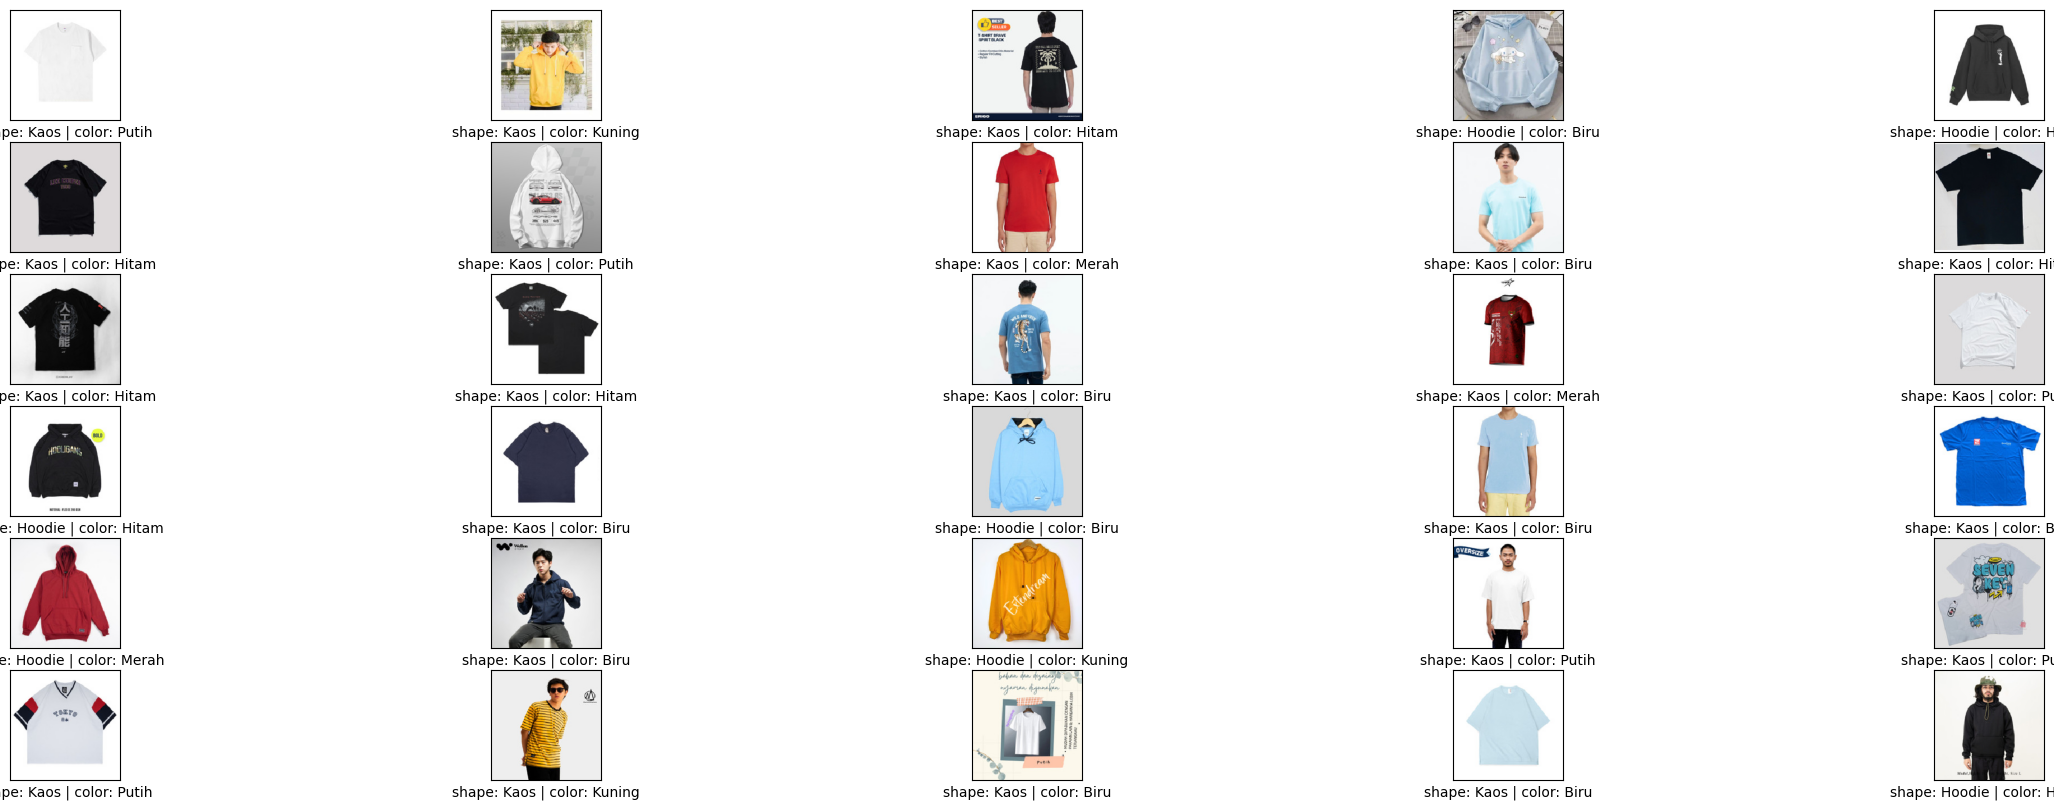

In [87]:
plt.figure(figsize=(30, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_to_be_predicted_normalized[i])
    plt.xlabel(f'shape: {index_to_shape_dict[predictions_for_submission[i][1]]} | color: {index_to_color_dict[predictions_for_submission[i][2]]}')
plt.show()

In [88]:
import pandas as pd

# Initialize an empty list to store DataFrames
dataframes = []

# Assuming predictions_for_submission is already defined
for (filename, shape_prediction, color_prediction) in predictions_for_submission:
    # Create a DataFrame for each prediction
    temp_df = pd.DataFrame({
        "id": [int(filename.split('.')[0])],  # Convert the ID to an integer
        "jenis": [shape_prediction],            # Create a list for shape prediction
        "warna": [color_prediction]             # Create a list for color prediction
    })

    # Append the temporary DataFrame to the list
    dataframes.append(temp_df)

# Concatenate all DataFrames in the list into a single DataFrame
submission_df = pd.concat(dataframes, ignore_index=True)

# Sort the DataFrame by the 'id' column as integers
submission_df['id'] = submission_df['id'].astype(int)  # Ensure the 'id' column is of integer type
submission_df = submission_df.sort_values(by='id', ascending=True)

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_multiclass.csv', index=False, sep=',', header=True)

print("DataFrame sorted by 'id' and saved to 'submission.csv'")

DataFrame sorted by 'id' and saved to 'submission.csv'
